By: Gabriel Peery

We'll read in from files after running some simulations.

In [2]:
from json import load
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [94]:
class SimResult:
    """Class to store results of a simulation, plot information about them. Best
    if used as return of read_results method.
    """
    
    def __init__(self,
        link_energy_predict : pd.DataFrame,
        link_time : pd.DataFrame,
        spin : pd.DataFrame,
        link : pd.DataFrame,
        meta : pd.DataFrame,
        config : dict
    ):
        """Stores information about a simulation, providing a convenient
        container for plotting.
        """
        self.link_energy_predict = link_energy_predict
        self.link_time = link_time
        self.spin = spin
        self.link = link
        self.meta = meta
        self.config = config
        
    def plot_equilibration(self, temp_idx : int):
        """Uses PyPlot to display a plot of link overlap as predicted during
        equilibration and as observed in the simulation as a function of Monte
        Carlo sweep, for the data at some temperature index.
        """
        # Put stuff on the plot
        plt.xscale("log")
        sweep_numbers = -1 + (2**(np.arange(len(self.link_time.iloc[0])) + 9))
        link_from_energy = np.array(list(self.link_energy_predict.iloc[temp_idx]))
        link_observed = np.array(list(self.link_time.iloc[temp_idx]))
        plt.plot(sweep_numbers, link_from_energy, "o-r", label="Predicted")
        plt.plot(sweep_numbers, link_observed, "o-b", label="Observed")
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(
            f"Link Overlap vs. Monte Carlo Sweep Number at T={this_temp:.2}"
        )
        plt.xlabel("$N_{sweep}$")
        plt.ylabel("$q_l$")
        plt.legend()
        plt.show()
        
    def plot_spin_dist(self, temp_idx : int):
        """Uses PyPlot to show a histogram of the spin overlaps observed during
        the simulation, for the states at some temperature determined by the
        index.
        """
        # Put on the plot
        q_values = np.linspace(-1, 0.99, 200)
        freqs = self.spin.iloc[temp_idx]
        plt.bar(q_values, freqs, 0.01, align="edge")
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(f"Distribution of Spin Overlap at T={this_temp:.2}")
        plt.xlim(-1, 1)
        plt.xlabel("$q$")
        plt.ylabel("$P(q)$")
        plt.show()
        
    def plot_link_dist(self, temp_idx : int):
        """Uses PyPlot to show a histogram of the link overlaps observed during
        the simulation, for the states at some temperature determined by the
        index.
        """
        # Put on the plot
        ql_values = np.linspace(-1, 0.99, 200)
        freqs = self.link.iloc[temp_idx]
        plt.bar(ql_values, freqs, 0.01, align="edge")
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(f"Distribution of Link Overlap at T={this_temp:.2}")
        plt.xlim(-1, 1)
        plt.xlabel("$q_l$")
        plt.ylabel("$P(q_l)$")
        plt.show()
    
    
# NOTE: This only works for Windows, systems with '\' as directory separator
def read_results(name : str) -> SimResult:
    """Given a name of a simulation, reads in data from the directory.
    
    Returns corresponding DataFrame's and dictionary of its configuration in a
    special class.
    """
    link_energy_predict = pd.read_csv(
        name + r"\link_energy_predict.csv",
        header=None
    )
    link_time = pd.read_csv(
        name + r"\link_time.csv",
        header=None
    )
    spin = pd.read_csv(
        name + r"\spin.csv",
        header=None
    )
    link = pd.read_csv(
        name + r"\link.csv",
        header=None
    )
    meta = pd.read_csv(
        name + r"\meta.csv",
        index_col=0
    )
    with open(name + r"\config.json") as config_file:
        config = load(config_file)
    return SimResult(link_energy_predict, link_time, spin, link, meta, config)

In [86]:
def full_suite_analysis(name : str):
    """Reads in a result, plots all the things"""
    sr = read_results(name)
    for i in range(len(sr.meta.index)):
        sr.plot_equilibration(i)
    for i in range(len(sr.meta.index)):
        sr.plot_spin_dist(i)
    for i in range(len(sr.meta.index)):
        sr.plot_link_dist(i)

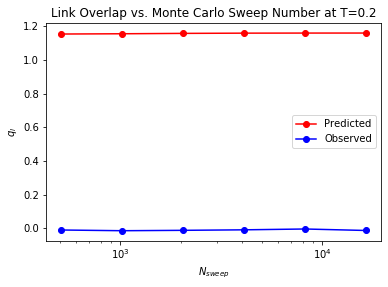

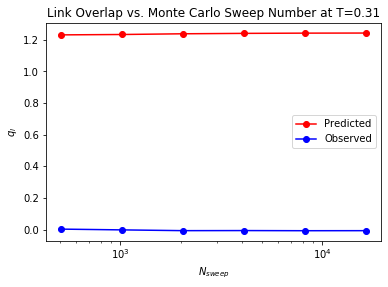

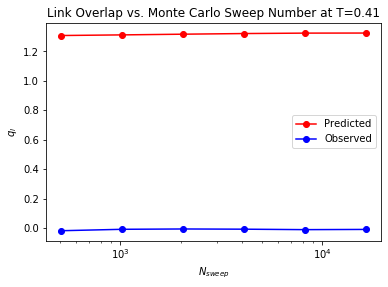

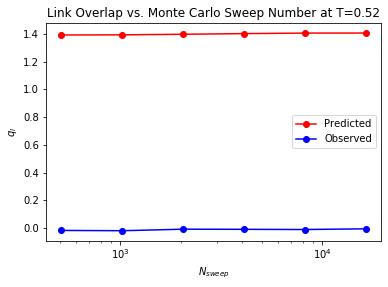

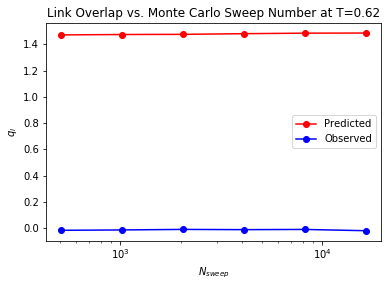

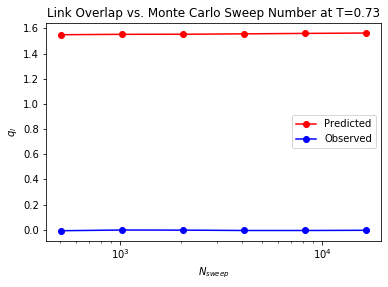

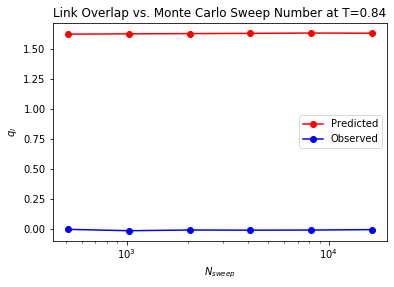

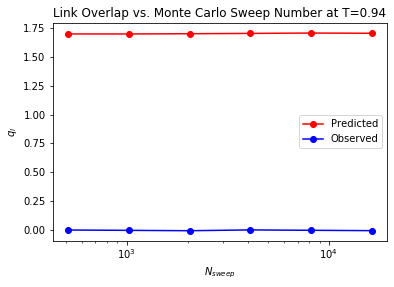

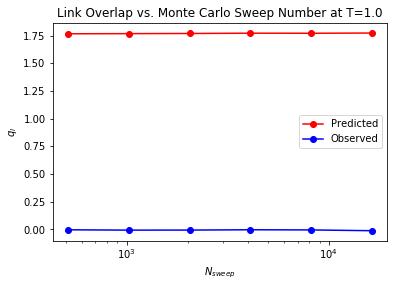

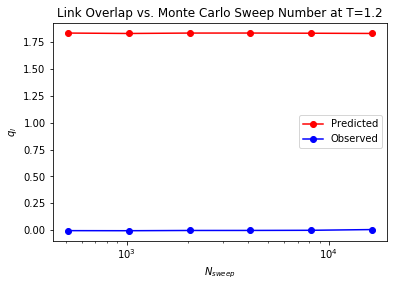

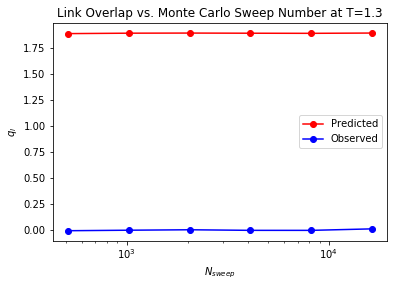

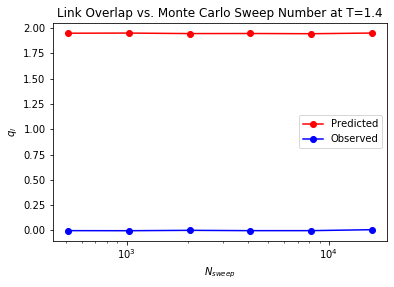

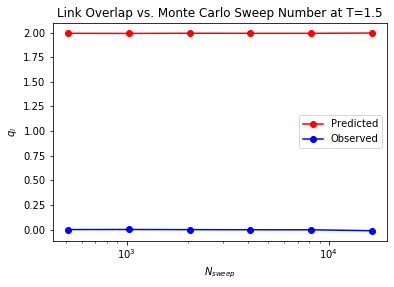

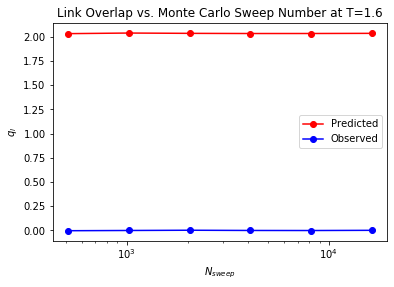

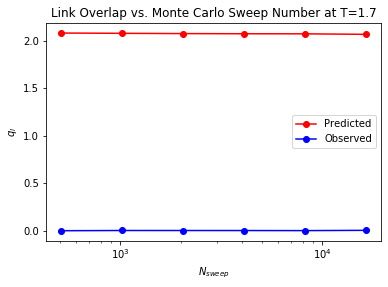

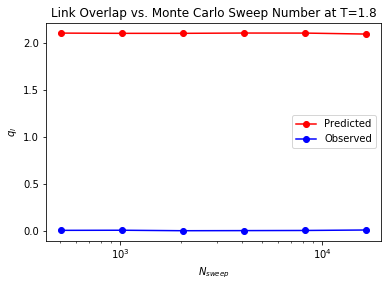

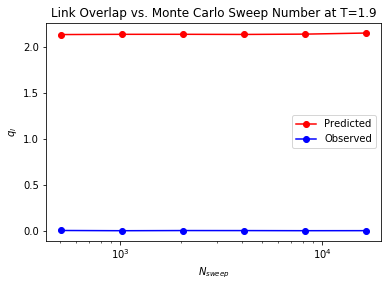

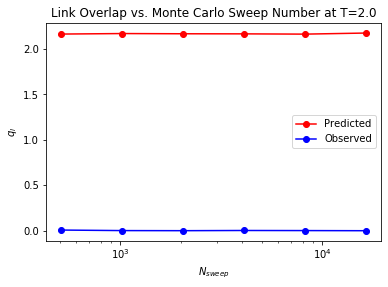

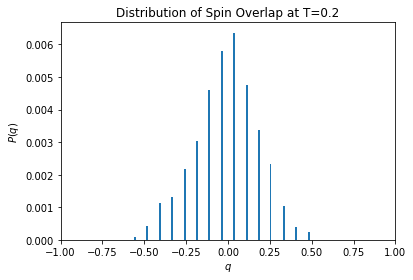

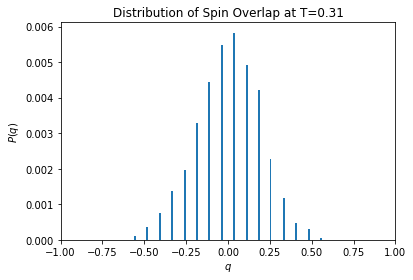

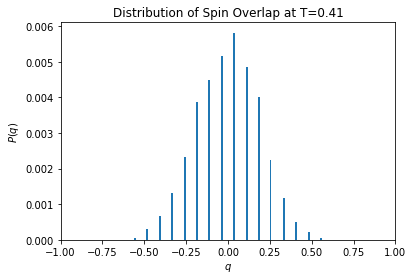

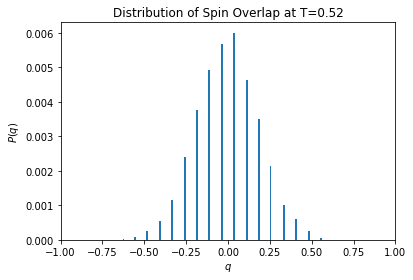

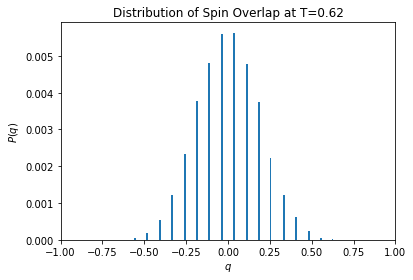

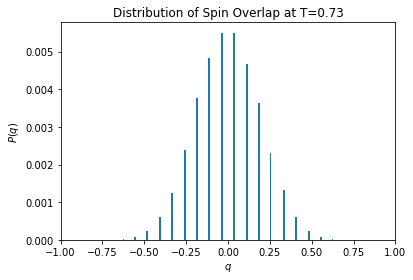

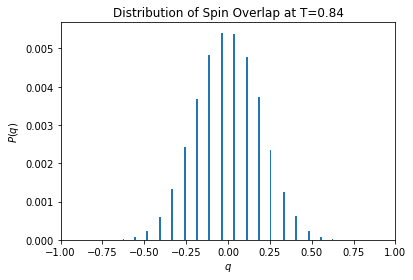

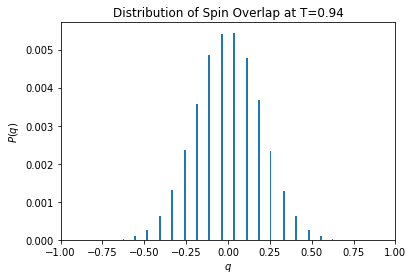

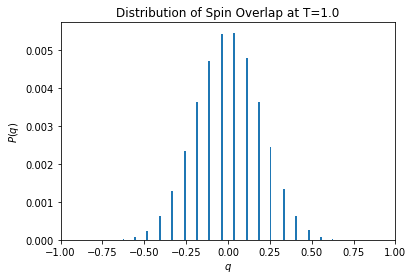

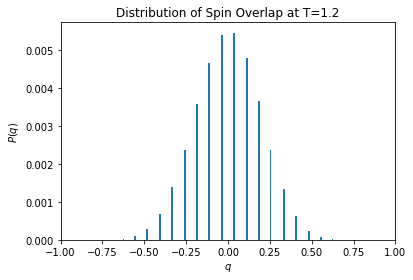

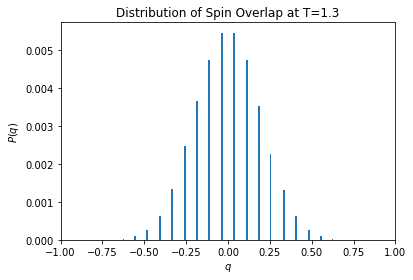

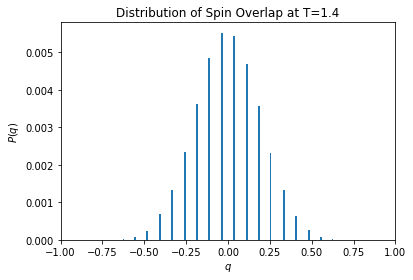

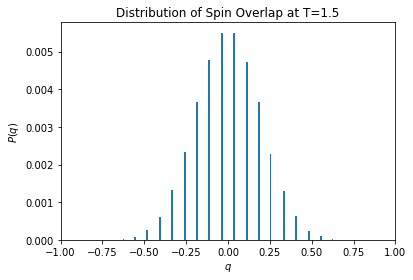

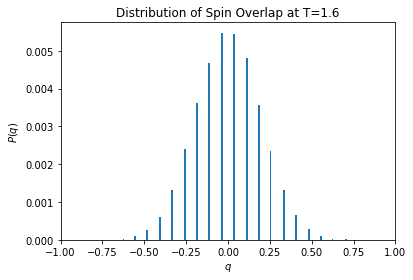

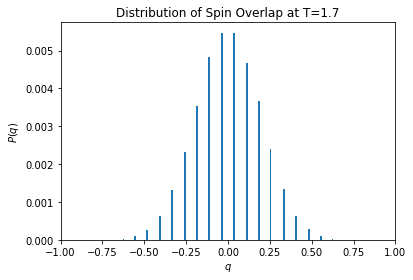

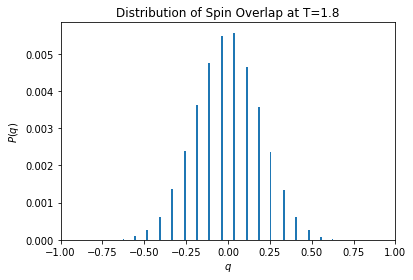

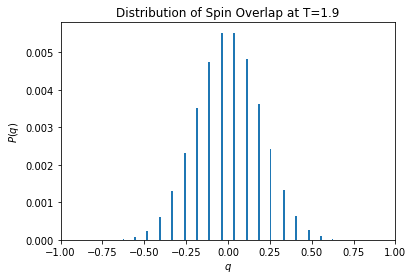

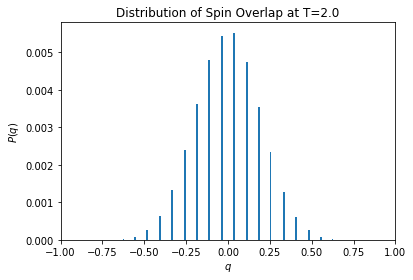

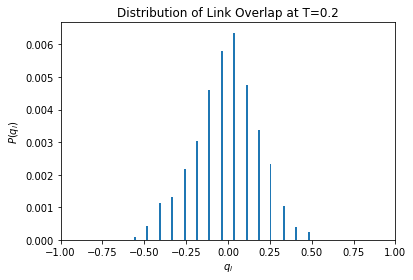

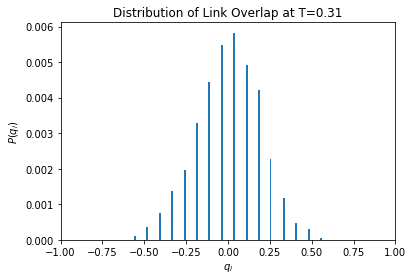

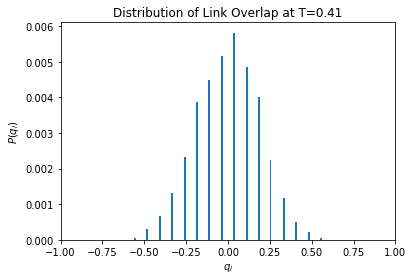

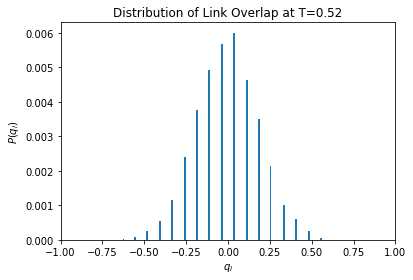

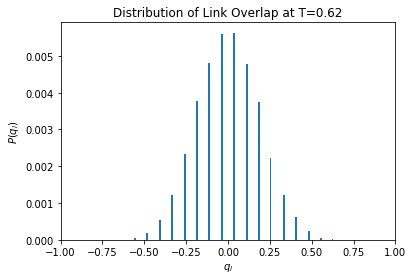

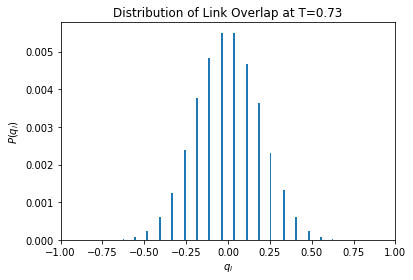

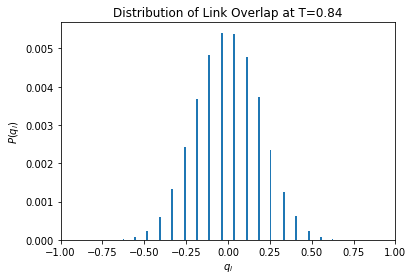

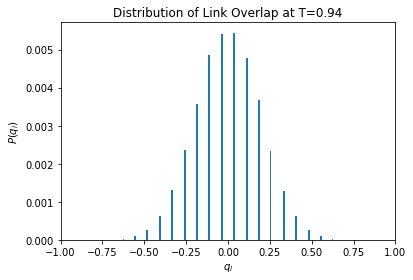

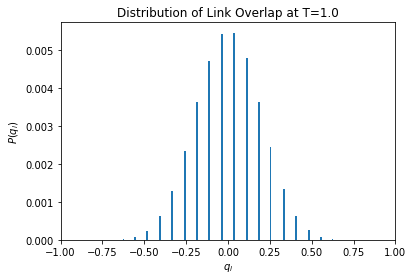

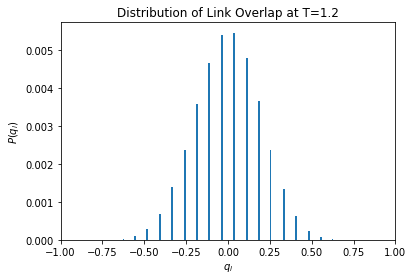

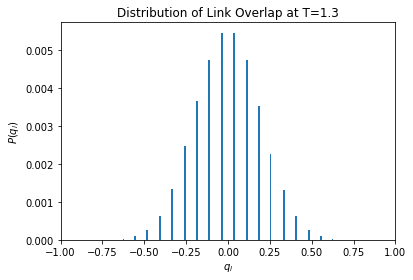

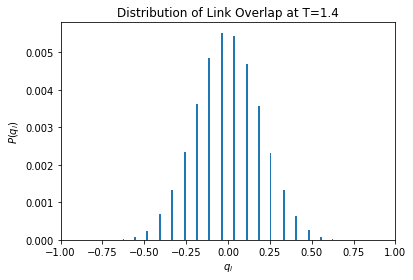

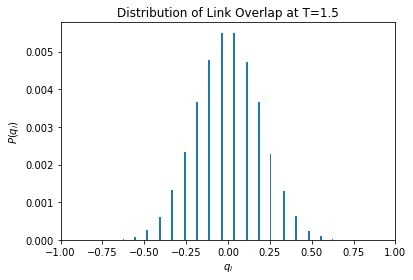

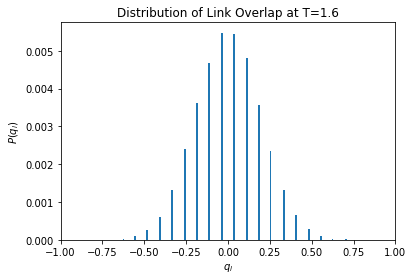

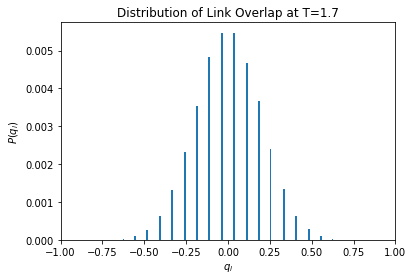

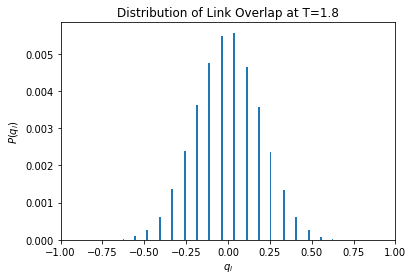

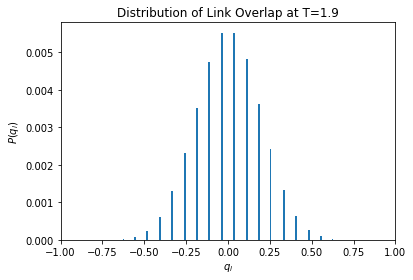

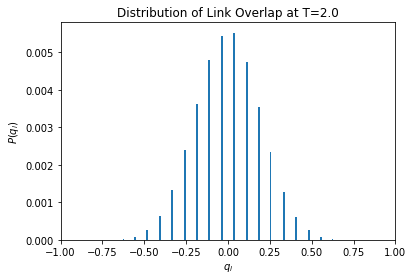

In [97]:
full_suite_analysis("small")

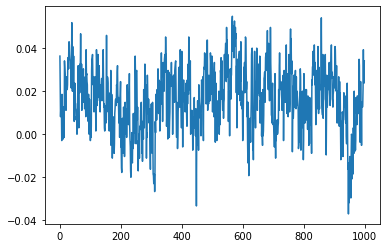

In [34]:
plt.plot(data[data["Beta"]==1.0].groupby("SweepID").mean()["SpinOverlap"] / (27))

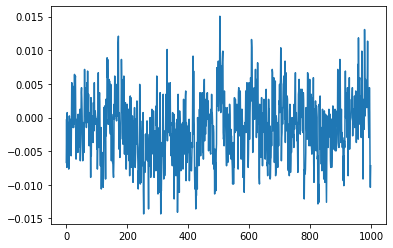

In [35]:
plt.plot(data[data["Beta"]==1.0].groupby("SweepID").mean()["LinkOverlap"] / (27*6))

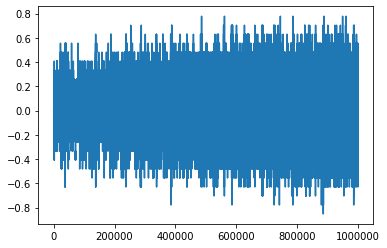

In [19]:
plt.plot(data["SpinOverlap"]/27)

In [14]:
df = pd.read_csv("vlarge.csv")

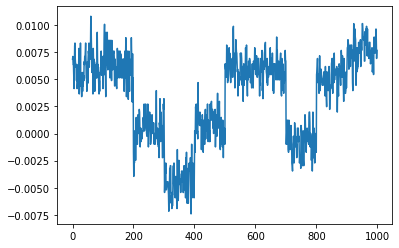

In [15]:
plt.plot(df)

In [36]:
y = list(data[data["Beta"]==2.0].groupby("SweepID").mean()["LinkOverlap"] / (27*6))

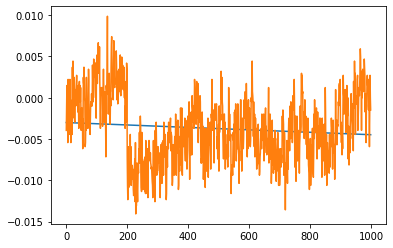

In [37]:
X = np.arange(len(y))
m, b = np.polyfit(X, y, 1)
fX = b + (m * X)
plt.plot(X, fX)
plt.plot(X, y)

In [38]:
m

-1.476530365419252e-06

In [41]:
avg_ql = data[data["Beta"]==2.0].groupby("SampleID").mean().mean()["LinkOverlap"]

In [42]:
U = 6 * (1 - avg_ql) / (0.5)

In [43]:
U

19.26768

In [44]:
avg_ql

-0.60564